In [140]:
import pandas as pd
import numpy as np
#%matplotlib nbagg
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.DataFrame()
path = "data_csv\\2017_05_"
csv = ".csv"
for num in range(14,30):
    tempPath = path+str(num)+csv
    #print(tempPath)
    df = pd.concat([df,pd.read_csv(tempPath,low_memory=False)])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197052 entries, 0 to 91093
Data columns (total 8 columns):
Status       1197052 non-null object
FirstLine    1197052 non-null object
Lon          1197052 non-null float64
Lines        1197052 non-null object
Time         1197052 non-null object
Lat          1197052 non-null float64
LowFloor     1197052 non-null bool
Brigade      1197052 non-null object
dtypes: bool(1), float64(2), object(5)
memory usage: 74.2+ MB


In [4]:
lines=[1, 2, 3, 4, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 20, 22, 23, 24, 25, 26, 27, 28, 31, 33, 35, 44]
data = df
arrayWithData = list()
for line in lines:
    dataTemp = data[data.FirstLine==line]
    dataTempLon = dataTemp[np.abs(dataTemp.Lon-dataTemp.Lon.mean())<3*dataTemp.Lon.std()]
    dataTempLonLat = dataTempLon[np.abs(dataTempLon.Lat-dataTempLon.Lat.mean())<3*dataTempLon.Lat.std()]
    arrayWithData.append(dataTempLonLat)


In [5]:
counterLine = []
counterNumber = []
for line in arrayWithData:
    counterLine.append(line.iloc[0].FirstLine)
    counterNumber.append(line.FirstLine.count())


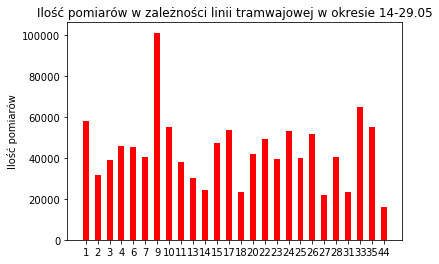

In [6]:
ind = np.arange(len(lines))  # the x locations for the groups
width = 0.5       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, counterNumber, width, color='r')
lineStr = tuple(map(lambda x: str(x), lines))
ax.set_xticklabels(lineStr)
ax.set_ylabel('Ilość pomiarów')
ax.set_title('Ilość pomiarów w zależności linii tramwajowej w okresie 14-29.05')
ax.set_xticks(ind)
plt.show()

In [7]:
data.Time.iloc[0]

'2017-05-14T20:35:37'

In [8]:
str(datetime.strptime(data.Time.iloc[0],"%Y-%m-%dT%H:%M:%S").date())

'2017-05-14'

In [9]:
datesSeries = pd.Series(map(lambda x: str(datetime.strptime(x,"%Y-%m-%dT%H:%M:%S").date()),data.Time))
dayofweekSeries = pd.Series(map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%S").isoweekday(),data.Time))

In [10]:
data = data.assign(Date=datesSeries.values)
data = data.assign(DayOfWeek=dayofweekSeries.values)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197052 entries, 0 to 91093
Data columns (total 10 columns):
Status       1197052 non-null object
FirstLine    1197052 non-null object
Lon          1197052 non-null float64
Lines        1197052 non-null object
Time         1197052 non-null object
Lat          1197052 non-null float64
LowFloor     1197052 non-null bool
Brigade      1197052 non-null object
Date         1197052 non-null object
DayOfWeek    1197052 non-null int64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 92.5+ MB


In [12]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196209 entries, 0 to 91093
Data columns (total 10 columns):
Status       1196209 non-null object
FirstLine    1196209 non-null object
Lon          1196209 non-null float64
Lines        1196209 non-null object
Time         1196209 non-null object
Lat          1196209 non-null float64
LowFloor     1196209 non-null bool
Brigade      1196209 non-null object
Date         1196209 non-null object
DayOfWeek    1196209 non-null int64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 92.4+ MB


In [13]:
data_grouped = data.groupby(['Date']).size()
data_grouped_dropped=data_grouped.drop(['2017-05-14', '2017-05-15'])
unique_dates = data.Date.unique()
tuple(unique_dates)

('2017-05-14',
 '2017-05-15',
 '2017-05-16',
 '2017-05-17',
 '2017-05-18',
 '2017-05-19',
 '2017-05-20',
 '2017-05-21',
 '2017-05-22',
 '2017-05-23',
 '2017-05-24',
 '2017-05-25',
 '2017-05-26',
 '2017-05-27',
 '2017-05-28',
 '2017-05-29')

In [14]:

dates = data_grouped_dropped.index.values
counter_per_date = data_grouped_dropped.values
unique_dates = unique_dates[2:]
unique_dates

array(['2017-05-16', '2017-05-17', '2017-05-18', '2017-05-19',
       '2017-05-20', '2017-05-21', '2017-05-22', '2017-05-23',
       '2017-05-24', '2017-05-25', '2017-05-26', '2017-05-27',
       '2017-05-28', '2017-05-29'], dtype=object)

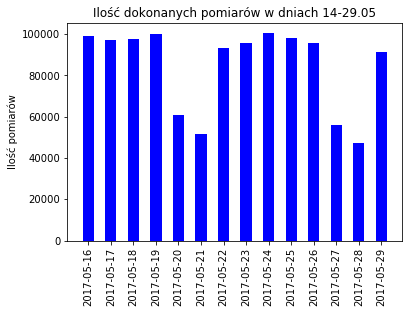

In [15]:
ind = np.arange(len(unique_dates))
width = 0.5       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, counter_per_date, width, color='b')

ax.set_xticklabels(tuple(unique_dates),rotation='vertical')
ax.set_ylabel('Ilość pomiarów')
ax.set_title('Ilość dokonanych pomiarów w dniach 14-29.05')
ax.set_xticks(ind)
plt.show()

In [16]:
N = 7
first_week = []
first_week.append(counter_per_date[13])
first_week.extend(list(counter_per_date[0:6]))
first_week = tuple(first_week)
second_week = list(counter_per_date[6:13])
second_week = tuple(second_week)

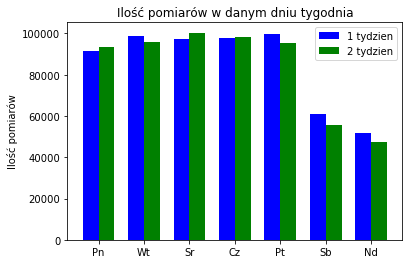

In [17]:
                                   
ind = np.arange(len(first_week))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, first_week, width, color='b')


rects2 = ax.bar(ind + width, second_week, width, color='g')

# add some text for labels, title and axes ticks
ax.set_ylabel('Ilość pomiarów')
ax.set_title('Ilość pomiarów w danym dniu tygodnia')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Pn', 'Wt', 'Sr', 'Cz', 'Pt','Sb', 'Nd'))

ax.legend((rects1[0], rects2[0]), ('1 tydzien', '2 tydzien'))



#autolabel(rects1)
#autolabel(rects2)

plt.show()

In [18]:
timestamps = pd.Series(map(lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%S").timestamp(),data.Time))
data = data.assign(Timestamp=timestamps.values)

In [19]:
#wyciagnac dane po linii a potem po numerze taboru
data_line_brigade = []

for line in lines:
    dataTemp = data[data.FirstLine==line]
    #data_line_brigade.append(dataTemp)
    unique_brigades = dataTemp.Brigade.unique()
    for brigade in unique_brigades:
        data_line_brigade.append(dataTemp[dataTemp.Brigade == brigade])


In [20]:
for temp_df in data_line_brigade:
    temp_df=temp_df.sort_values('Timestamp')
data_line_brigade[0].head()

,Status,FirstLine,Lon,Lines,Time,Lat,LowFloor,Brigade,Date,DayOfWeek,Timestamp
17,RUNNING,1,21.021954,1,2017-05-14T20:35:37,52.298477,True,13,2017-05-14,7,1.494787e+09
176,RUNNING,1,21.021954,1,2017-05-14T20:38:46,52.298477,True,13,2017-05-14,7,1.494787e+09
378,RUNNING,1,21.021954,1,2017-05-14T20:41:44,52.298477,True,13,2017-05-14,7,1.494787e+09
547,RUNNING,1,21.021954,1,2017-05-14T20:44:22,52.298477,True,13,2017-05-14,7,1.494787e+09
650,RUNNING,1,21.026802,1,2017-05-14T20:47:36,52.293835,True,13,2017-05-14,7,1.494788e+09


In [21]:
import math
def CountDistance(lat1, lng1, lat2, lng2):
    earthRadius = 6371000.0;
    
    dLat = math.radians(lat2-lat1)
    dLng = math.radians(lng2-lng1)
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLng/2) * math.sin(dLng/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    dist = (earthRadius * c)
    
    return dist 

In [22]:
N = data_line_brigade[0].count().Status
lon = data_line_brigade[0].Lon.values
lat = data_line_brigade[0].Lat.values
timestamps = data_line_brigade[0].Timestamp.values

In [44]:
mean_speeds = []
first_line = []
brigade = []

for single_data in data_line_brigade:
    N = single_data.count().Status
    lon = single_data.Lon.values
    lat = single_data.Lat.values
    timestamps = single_data.Timestamp.values
    speed = []

    for i in range(0,N-1):
        dist = CountDistance(lat[i],lon[i],lat[i+1],lon[i+1])
        if timestamps[i+1]-timestamps[i] > 0:
            speed_temp = dist/(timestamps[i+1]-timestamps[i])
            speed.append(np.abs(speed_temp*3.6))

    mean_speeds.append(np.mean(speed))
    first_line.append(single_data.FirstLine.iloc[0])
    brigade.append(single_data.Brigade.iloc[0])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [49]:
mean_speeds_series = pd.Series(mean_speeds)
first_line_series = pd.Series(first_line)
brigade_series = pd.Series(brigade)

In [66]:
speed_line_brigade_df = pd.DataFrame()
speed_line_brigade_df = speed_line_brigade_df.assign(FirstLine=first_line)
speed_line_brigade_df = speed_line_brigade_df.assign(Brigade=brigade)
speed_line_brigade_df = speed_line_brigade_df.assign(MeanSpeed=mean_speeds)
speed_line_brigade_df.head()

,FirstLine,Brigade,MeanSpeed
0,1,13,12.552557
1,1,16,12.299541
2,1,9,12.228868
3,1,10,11.808488
4,1,4,11.286600


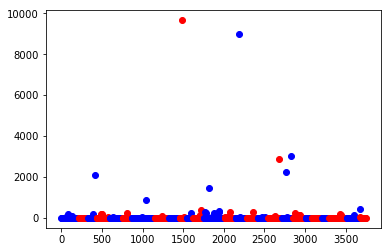

In [83]:
def plotDataFrame(input_df):
    i=1
    xcounter=0
    for line in lines:
        if i==1:
            i=-i
            temp_df = input_df[input_df.FirstLine == line]
            elems = len(temp_df.index)
            rng = list(map(lambda x: x*5,range(xcounter,xcounter+elems)))
            plt.plot(rng,temp_df.MeanSpeed.values,'bo')
            xcounter = xcounter+elems
        else:
            i=-i
            temp_df = input_df[input_df.FirstLine == line]
            elems = len(temp_df.index)
            rng = list(map(lambda x: x*5,range(xcounter,xcounter+elems)))
            plt.plot(rng,temp_df.MeanSpeed.values,'ro')
            xcounter = xcounter+elems

    #plt.plot(np.arange(750)[1::2],speed_line_brigade_df.MeanSpeed.values[1::2],'ro')
    plt.show()

plotDataFrame(speed_line_brigade_df)

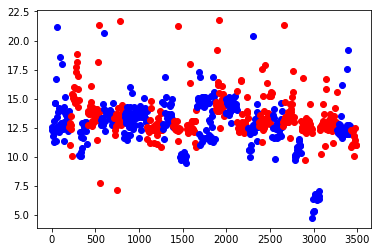

In [84]:

speed_line_brigade_df_reduced = speed_line_brigade_df[speed_line_brigade_df.MeanSpeed < 25]
speed_line_brigade_df_reduced = speed_line_brigade_df_reduced[speed_line_brigade_df_reduced.MeanSpeed > 2]

plotDataFrame(speed_line_brigade_df_reduced)

In [85]:
median_speed = []
for line in lines:
    temp_df = speed_line_brigade_df_reduced[speed_line_brigade_df_reduced.FirstLine == line]
    median_speed.append(temp_df.MeanSpeed.median())



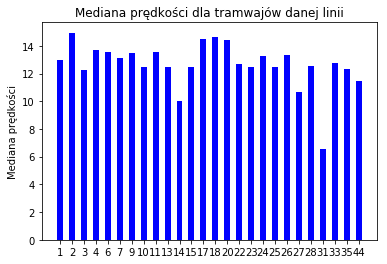

In [88]:
ind = np.arange(len(lines))  # the x locations for the groups
width = 0.5       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, median_speed, width, color='b')
lineStr = tuple(map(lambda x: str(x), lines))
ax.set_xticklabels(lineStr)
ax.set_ylabel('Mediana prędkości')
ax.set_title('Mediana prędkości dla tramwajów danej linii')
ax.set_xticks(ind)
plt.show()


In [113]:
colors = ['#000000', '#000080', '#00008B', '#0000CD', '#0000FF', '#006400', '#008000', '#008080', '#008B8B', '#00BFFF', '#00CED1', '#00FA9A', '#00FF00', '#00FF7F', '#00FFFF', '#00FFFF', '#191970', '#1E90FF', '#20B2AA', '#228B22', '#2E8B57', '#2F4F4F', '#2F4F4F', '#32CD32', '#3CB371', '#40E0D0', '#4169E1', '#4682B4', '#483D8B', '#48D1CC', '#4B0082', '#556B2F', '#5F9EA0', '#6495ED', '#663399', '#66CDAA', '#696969', '#696969', '#6A5ACD', '#6B8E23', '#708090', '#708090', '#778899', '#778899', '#7B68EE', '#7CFC00', '#7FFF00', '#7FFFD4', '#800000', '#800080', '#808000', '#808080', '#808080', '#87CEEB', '#87CEFA', '#8A2BE2', '#8B0000', '#8B008B', '#8B4513', '#8FBC8F', '#90EE90', '#9370DB', '#9400D3', '#98FB98', '#9932CC', '#9ACD32', '#A0522D', '#A52A2A', '#A9A9A9', '#A9A9A9', '#ADD8E6', '#ADFF2F', '#AFEEEE', '#B0C4DE', '#B0E0E6', '#B22222', '#B8860B', '#BA55D3', '#BC8F8F', '#BDB76B', '#C0C0C0', '#C71585', '#CD5C5C', '#CD853F', '#D2691E', '#D2B48C', '#D3D3D3', '#D3D3D3', '#D8BFD8', '#DA70D6', '#DAA520', '#DB7093', '#DC143C', '#DCDCDC', '#DDA0DD', '#DEB887', '#E0FFFF', '#E6E6FA', '#E9967A', '#EE82EE', '#EEE8AA', '#F08080', '#F0E68C', '#F0F8FF', '#F0FFF0', '#F0FFFF', '#F4A460', '#F5DEB3', '#F5F5DC', '#F5F5F5', '#F5FFFA', '#F8F8FF', '#FA8072', '#FAEBD7', '#FAF0E6', '#FAFAD2', '#FDF5E6', '#FF0000', '#FF00FF', '#FF00FF', '#FF1493', '#FF4500', '#FF6347', '#FF69B4', '#FF7F50', '#FF8C00', '#FFA07A', '#FFA500', '#FFB6C1', '#FFC0CB', '#FFD700', '#FFDAB9', '#FFDEAD', '#FFE4B5', '#FFE4C4', '#FFE4E1', '#FFEBCD', '#FFEFD5', '#FFF0F5', '#FFF5EE', '#FFF8DC', '#FFFACD', '#FFFAF0', '#FFFAFA', '#FFFF00', '#FFFFE0', '#FFFFF0', '#FFFFFF']
import random

In [141]:
def plot_lines(lines_arr,whole_map=True):
    if whole_map:
        for oneLine in arrayWithData:
            plt.plot( oneLine.Lon,oneLine.Lat, 'r.')
    for line in lines_arr:
        index = lines.index(line)
        temp_df = arrayWithData[index]
        plt.plot( temp_df.Lon,temp_df.Lat, marker = '.', markerfacecolor=random.choice(colors), linestyle = '')
        plt.title = 'Trasa linii'
    plt.show()

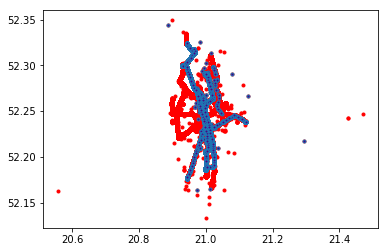

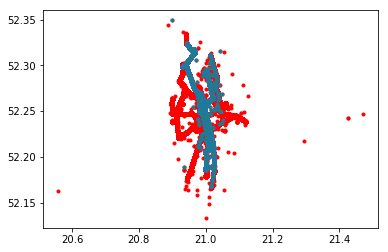

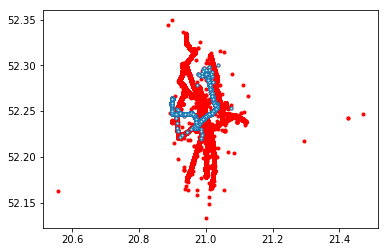

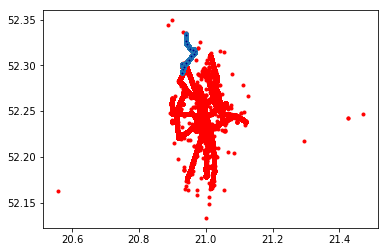

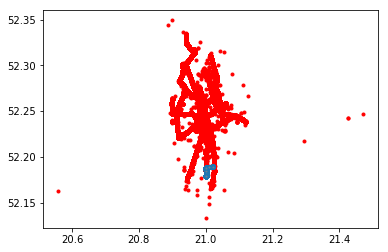

In [142]:
plot_lines([17])
plot_lines([18])
plot_lines([20])
plot_lines([2])
plot_lines([31])